### Clustering Instagram Users Based on Followers and Likes using DBSCAN

#### Importing libraries

In [1]:
# ---- Step 1: Import Libraries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

#### Loading Dataset

In [10]:

# ---- Step 2: Load Dataset ----
# Replace with your Kaggle dataset file name
df = pd.read_csv(r"C:\Users\User\Desktop\Traffic\instagram_reach.csv")

# Preview first rows
print("Dataset Preview:")
display(df.head())


Dataset Preview:


,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


#### Checking columns names

In [11]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

### Select Numeric features

In [12]:

# ---- Step 3: Select Numeric Features ----
# Change column names according to your dataset
# For example: "Posts", "Followers", "Likes"
features = ["Followers","Likes"]  
X = df[features].dropna().values
X

array([[1600,  139],
       [ 880,   23],
       [ 255,   25],
       [ 340,   49],
       [ 304,   30],
       [1231,   18],
       [ 259,   35],
       [1433,   86],
       [  13,   22],
       [ 450,   18],
       [ 149,   31],
       [2232,   48],
       [1061,   80],
       [ 533,   94],
       [2904,   28],
       [ 971,   53],
       [ 285,   29],
       [ 520,   46],
       [  75,   30],
       [2691,   34],
       [ 966,  198],
       [ 334,   19],
       [1041,   20],
       [4496,   11],
       [ 166,   10],
       [1211,   46],
       [ 265,   25],
       [1618,  148],
       [ 279,   43],
       [ 279,   37],
       [ 828,   90],
       [  12,   19],
       [ 894,   14],
       [ 610,   30],
       [ 226,  273],
       [1168,   13],
       [ 835,   93],
       [ 124,   24],
       [ 193,   18],
       [1600,  136],
       [ 258,   24],
       [ 105,    8],
       [ 273,   41],
       [ 914,   81],
       [ 118,   16],
       [ 122,   31],
       [1180,   24],
       [3139,

### Scaling Data

In [13]:

# ---- Step 4: Scale Data ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Applying DBSCAN

In [14]:

# ---- Step 5: Apply DBSCAN ----
dbscan = DBSCAN(eps=1.5, min_samples=5)  # tune eps & min_samples
labels = dbscan.fit_predict(X_scaled)


In [15]:

# Add results back to DataFrame
df["Cluster"] = labels

print("\nCluster Counts:")
print(df["Cluster"].value_counts())


Cluster Counts:
Cluster
 0    98
-1     2
Name: count, dtype: int64


### Visualization

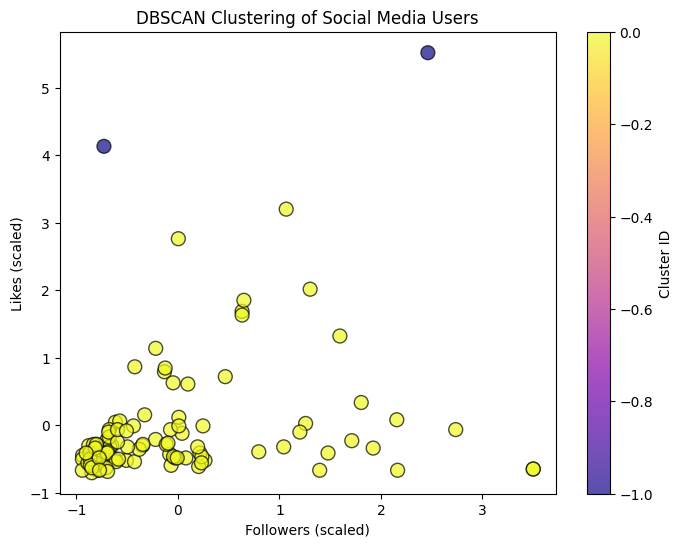

In [16]:
# ---- Step 6: Visualization ----
# (Using first two features for 2D visualization)
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled[:,0], X_scaled[:,1],
    c=labels, cmap="plasma", s=100, alpha=0.7, edgecolors="k"
)
plt.title("DBSCAN Clustering of Social Media Users")
plt.xlabel(features[0] + " (scaled)")
plt.ylabel(features[1] + " (scaled)")
plt.colorbar(label="Cluster ID")
plt.show()

### Cluster insights

In [17]:
# ---- Step 7: Cluster Insights ----
cluster_summary = df.groupby("Cluster")[features].mean()
print("\nCluster Summary (mean values):")
display(cluster_summary)



Cluster Summary (mean values):


,Followers,Likes
Cluster,,
-1,1837.000000,311.000000
0,944.102041,41.081633
